<a href="https://colab.research.google.com/github/hoangtc125/algo-clustering-service/blob/main/text_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP preparing

In [ ]:
# Cài đặt hugging face
!pip install transformers
!pip install sentencepiece
# Cài đặt thư viện underthesea để thực hiện word segment
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load model BERT
import torch
from transformers import AutoModel, AutoTokenizer, T5ForConditionalGeneration, T5Tokenizer
# Chuẩn hoá câu
import gensim
# Phân tách từ
import underthesea
# Trích xuất đặc trưng
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load model vector hóa
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

# if torch.cuda.is_available():       
#     device = torch.device("cuda")

#     print('There are %d GPU(s) available.' % torch.cuda.device_count())

#     print('We will use the GPU:', torch.cuda.get_device_name(0))
# else:
#     print('No GPU available, using the CPU instead.')
#     device = torch.device("cpu")

# # Load model summarization
# model = T5ForConditionalGeneration.from_pretrained("NlpHUST/t5-small-vi-summarization")
# t5tokenizer = T5Tokenizer.from_pretrained("NlpHUST/t5-small-vi-summarization")
# model.to(device)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# fname = 'vn_stopword.txt'
# stopWordData = np.genfromtxt(fname, dtype='str', delimiter='\n')
# stopWordData = stopWordData.tolist()
stopWordData = "a lô*a ha*ai*ai ai*ai nấy*ai đó*alô*amen*anh*anh ấy*ba*ba ba*ba bản*ba cùng*ba họ*ba ngày*ba ngôi*ba tăng*bao giờ*bao lâu*bao nhiêu*bao nả*bay biến*biết*biết bao*biết bao nhiêu*biết chắc*biết chừng nào*biết mình*biết mấy*biết thế*biết trước*biết việc*biết đâu*biết đâu chừng*biết đâu đấy*biết được*buổi*buổi làm*buổi mới*buổi ngày*buổi sớm*bà*bà ấy*bài*bài bác*bài bỏ*bài cái*bác*bán*bán cấp*bán dạ*bán thế*bây bẩy*bây chừ*bây giờ*bây nhiêu*bèn*béng*bên*bên bị*bên có*bên cạnh*bông*bước*bước khỏi*bước tới*bước đi*bạn*bản*bản bộ*bản riêng*bản thân*bản ý*bất chợt*bất cứ*bất giác*bất kì*bất kể*bất kỳ*bất luận*bất ngờ*bất nhược*bất quá*bất quá chỉ*bất thình lình*bất tử*bất đồ*bấy*bấy chầy*bấy chừ*bấy giờ*bấy lâu*bấy lâu nay*bấy nay*bấy nhiêu*bập bà bập bõm*bập bõm*bắt đầu*bắt đầu từ*bằng*bằng cứ*bằng không*bằng người*bằng nhau*bằng như*bằng nào*bằng nấy*bằng vào*bằng được*bằng ấy*bển*bệt*bị*bị chú*bị vì*bỏ*bỏ bà*bỏ cha*bỏ cuộc*bỏ không*bỏ lại*bỏ mình*bỏ mất*bỏ mẹ*bỏ nhỏ*bỏ quá*bỏ ra*bỏ riêng*bỏ việc*bỏ xa*bỗng*bỗng chốc*bỗng dưng*bỗng không*bỗng nhiên*bỗng nhưng*bỗng thấy*bỗng đâu*bộ*bộ thuộc*bộ điều*bội phần*bớ*bởi*bởi ai*bởi chưng*bởi nhưng*bởi sao*bởi thế*bởi thế cho nên*bởi tại*bởi vì*bởi vậy*bởi đâu*bức*cao*cao lâu*cao ráo*cao răng*cao sang*cao số*cao thấp*cao thế*cao xa*cha*cha chả*chao ôi*chia sẻ*chiếc*cho*cho biết*cho chắc*cho hay*cho nhau*cho nên*cho rằng*cho rồi*cho thấy*cho tin*cho tới*cho tới khi*cho về*cho ăn*cho đang*cho được*cho đến*cho đến khi*cho đến nỗi*choa*chu cha*chui cha*chung*chung cho*chung chung*chung cuộc*chung cục*chung nhau*chung qui*chung quy*chung quy lại*chung ái*chuyển*chuyển tự*chuyển đạt*chuyện*chuẩn bị*chành chạnh*chí chết*chính*chính bản*chính giữa*chính là*chính thị*chính điểm*chùn chùn*chùn chũn*chú*chú dẫn*chú khách*chú mày*chú mình*chúng*chúng mình*chúng ta*chúng tôi*chúng ông*chăn chắn*chăng*chăng chắc*chăng nữa*chơi*chơi họ*chưa*chưa bao giờ*chưa chắc*chưa có*chưa cần*chưa dùng*chưa dễ*chưa kể*chưa tính*chưa từng*chầm chập*chậc*chắc*chắc chắn*chắc dạ*chắc hẳn*chắc lòng*chắc người*chắc vào*chắc ăn*chẳng lẽ*chẳng những*chẳng nữa*chẳng phải*chết nỗi*chết thật*chết tiệt*chỉ*chỉ chính*chỉ có*chỉ là*chỉ tên*chỉn*chị*chị bộ*chị ấy*chịu*chịu chưa*chịu lời*chịu tốt*chịu ăn*chọn*chọn bên*chọn ra*chốc chốc*chớ*chớ chi*chớ gì*chớ không*chớ kể*chớ như*chợt*chợt nghe*chợt nhìn*chủn*chứ*chứ ai*chứ còn*chứ gì*chứ không*chứ không phải*chứ lại*chứ lị*chứ như*chứ sao*coi bộ*coi mòi*con*con con*con dạ*con nhà*con tính*cu cậu*cuối*cuối cùng*cuối điểm*cuốn*cuộc*càng*càng càng*càng hay*cá nhân*các*các cậu*cách*cách bức*cách không*cách nhau*cách đều*cái*cái gì*cái họ*cái đã*cái đó*cái ấy*câu hỏi*cây*cây nước*còn*còn như*còn nữa*còn thời gian*còn về*còn có*có*có ai*có chuyện*có chăng*có chăng là*có chứ*có cơ*có dễ*có họ*có khi*có ngày*có người*có nhiều*có nhà*có phải*có số*có tháng*có thế*có thể*có vẻ*có ý*có ăn*có điều*có điều kiện*có đáng*có đâu*có được*cóc khô*cô*cô mình*cô quả*cô tăng*cô ấy*công nhiên*cùng*cùng chung*cùng cực*cùng nhau*cùng tuổi*cùng tột*cùng với*cùng ăn*căn*căn cái*căn cắt*căn tính*cũng*cũng như*cũng nên*cũng thế*cũng vậy*cũng vậy thôi*cũng được*cơ*cơ chỉ*cơ chừng*cơ cùng*cơ dẫn*cơ hồ*cơ hội*cơ mà*cơn*cả*cả nghe*cả nghĩ*cả ngày*cả người*cả nhà*cả năm*cả thảy*cả thể*cả tin*cả ăn*cả đến*cảm thấy*cảm ơn*cấp*cấp số*cấp trực tiếp*cần*cần cấp*cần gì*cần số*cật lực*cật sức*cậu*cổ lai*cụ thể*cụ thể là*cụ thể như*của*của ngọt*của tin*cứ*cứ như*cứ việc*cứ điểm*cực lực*do*do vì*do vậy*do đó*duy*duy chỉ*duy có*dài*dài lời*dài ra*dành*dành dành*dào*dì*dù*dù cho*dù dì*dù gì*dù rằng*dù sao*dùng*dùng cho*dùng hết*dùng làm*dùng đến*dưới*dưới nước*dạ*dạ bán*dạ con*dạ dài*dạ dạ*dạ khách*dần dà*dần dần*dầu sao*dẫn*dẫu*dẫu mà*dẫu rằng*dẫu sao*dễ*dễ dùng*dễ gì*dễ khiến*dễ nghe*dễ ngươi*dễ như chơi*dễ sợ*dễ sử dụng*dễ thường*dễ thấy*dễ ăn*dễ đâu*dở chừng*dữ*dữ cách*em*em em*giá trị*giá trị thực tế*giảm*giảm chính*giảm thấp*giảm thế*giống*giống người*giống nhau*giống như*giờ*giờ lâu*giờ này*giờ đi*giờ đây*giờ đến*giữ*giữ lấy*giữ ý*giữa*giữa lúc*gây*gây cho*gây giống*gây ra*gây thêm*gì*gì gì*gì đó*gần*gần bên*gần hết*gần ngày*gần như*gần xa*gần đây*gần đến*gặp*gặp khó khăn*gặp phải*gồm*hay*hay biết*hay hay*hay không*hay là*hay làm*hay nhỉ*hay nói*hay sao*hay tin*hay đâu*hiểu*hiện nay*hiện tại*hoàn toàn*hoặc*hoặc là*hãy*hãy còn*hơn*hơn cả*hơn hết*hơn là*hơn nữa*hơn trước*hầu hết*hết*hết chuyện*hết cả*hết của*hết nói*hết ráo*hết rồi*hết ý*họ*họ gần*họ xa*hỏi*hỏi lại*hỏi xem*hỏi xin*hỗ trợ*khi*khi khác*khi không*khi nào*khi nên*khi trước*khiến*khoảng*khoảng cách*khoảng không*khá*khá tốt*khác*khác gì*khác khác*khác nhau*khác nào*khác thường*khác xa*khách*khó*khó biết*khó chơi*khó khăn*khó làm*khó mở*khó nghe*khó nghĩ*khó nói*khó thấy*khó tránh*không*không ai*không bao giờ*không bao lâu*không biết*không bán*không chỉ*không còn*không có*không có gì*không cùng*không cần*không cứ*không dùng*không gì*không hay*không khỏi*không kể*không ngoài*không nhận*không những*không phải*không phải không*không thể*không tính*không điều kiện*không được*không đầy*không để*khẳng định*khỏi*khỏi nói*kể*kể cả*kể như*kể tới*kể từ*liên quan*loại*loại từ*luôn*luôn cả*luôn luôn*luôn tay*là*là cùng*là là*là nhiều*là phải*là thế nào*là vì*là ít*làm*làm bằng*làm cho*làm dần dần*làm gì*làm lòng*làm lại*làm lấy*làm mất*làm ngay*làm như*làm nên*làm ra*làm riêng*làm sao*làm theo*làm thế nào*làm tin*làm tôi*làm tăng*làm tại*làm tắp lự*làm vì*làm đúng*làm được*lâu*lâu các*lâu lâu*lâu nay*lâu ngày*lên*lên cao*lên cơn*lên mạnh*lên ngôi*lên nước*lên số*lên xuống*lên đến*lòng*lòng không*lúc*lúc khác*lúc lâu*lúc nào*lúc này*lúc sáng*lúc trước*lúc đi*lúc đó*lúc đến*lúc ấy*lý do*lượng*lượng cả*lượng số*lượng từ*lại*lại bộ*lại cái*lại còn*lại giống*lại làm*lại người*lại nói*lại nữa*lại quả*lại thôi*lại ăn*lại đây*lấy*lấy có*lấy cả*lấy giống*lấy làm*lấy lý do*lấy lại*lấy ra*lấy ráo*lấy sau*lấy số*lấy thêm*lấy thế*lấy vào*lấy xuống*lấy được*lấy để*lần*lần khác*lần lần*lần nào*lần này*lần sang*lần sau*lần theo*lần trước*lần tìm*lớn*lớn lên*lớn nhỏ*lời*lời chú*lời nói*mang*mang lại*mang mang*mang nặng*mang về*muốn*mà*mà cả*mà không*mà lại*mà thôi*mà vẫn*mình*mạnh*mất*mất còn*mọi*mọi giờ*mọi khi*mọi lúc*mọi người*mọi nơi*mọi sự*mọi thứ*mọi việc*mối*mỗi*mỗi lúc*mỗi lần*mỗi một*mỗi ngày*mỗi người*một*một cách*một cơn*một khi*một lúc*một số*một vài*một ít*mới*mới hay*mới rồi*mới đây*mở*mở mang*mở nước*mở ra*mợ*mức*nay*ngay*ngay bây giờ*ngay cả*ngay khi*ngay khi đến*ngay lúc*ngay lúc này*ngay lập tức*ngay thật*ngay tức khắc*ngay tức thì*ngay từ*nghe*nghe chừng*nghe hiểu*nghe không*nghe lại*nghe nhìn*nghe như*nghe nói*nghe ra*nghe rõ*nghe thấy*nghe tin*nghe trực tiếp*nghe đâu*nghe đâu như*nghe được*nghen*nghiễm nhiên*nghĩ*nghĩ lại*nghĩ ra*nghĩ tới*nghĩ xa*nghĩ đến*nghỉm*ngoài*ngoài này*ngoài ra*ngoài xa*ngoải*nguồn*ngày*ngày càng*ngày cấp*ngày giờ*ngày ngày*ngày nào*ngày này*ngày nọ*ngày qua*ngày rày*ngày tháng*ngày xưa*ngày xửa*ngày đến*ngày ấy*ngôi*ngôi nhà*ngôi thứ*ngõ hầu*ngăn ngắt*ngươi*người*người hỏi*người khác*người khách*người mình*người nghe*người người*người nhận*ngọn*ngọn nguồn*ngọt*ngồi*ngồi bệt*ngồi không*ngồi sau*ngồi trệt*ngộ nhỡ*nhanh*nhanh lên*nhanh tay*nhau*nhiên hậu*nhiều*nhiều ít*nhiệt liệt*nhung nhăng*nhà*nhà chung*nhà khó*nhà làm*nhà ngoài*nhà ngươi*nhà tôi*nhà việc*nhân dịp*nhân tiện*nhé*nhìn*nhìn chung*nhìn lại*nhìn nhận*nhìn theo*nhìn thấy*nhìn xuống*nhóm*nhón nhén*như*như ai*như chơi*như không*như là*như nhau*như quả*như sau*như thường*như thế*như thế nào*như thể*như trên*như trước*như tuồng*như vậy*như ý*nhưng*nhưng mà*nhược bằng*nhất*nhất loạt*nhất luật*nhất là*nhất mực*nhất nhất*nhất quyết*nhất sinh*nhất thiết*nhất thì*nhất tâm*nhất tề*nhất đán*nhất định*nhận*nhận biết*nhận họ*nhận làm*nhận nhau*nhận ra*nhận thấy*nhận việc*nhận được*nhằm*nhằm khi*nhằm lúc*nhằm vào*nhằm để*nhỉ*nhỏ*nhỏ người*nhớ*nhớ bập bõm*nhớ lại*nhớ lấy*nhớ ra*nhờ*nhờ chuyển*nhờ có*nhờ nhờ*nhờ đó*nhỡ ra*những*những ai*những khi*những là*những lúc*những muốn*những như*nào*nào cũng*nào hay*nào là*nào phải*nào đâu*nào đó*này*này nọ*nên*nên chi*nên chăng*nên làm*nên người*nên tránh*nó*nóc*nói*nói bông*nói chung*nói khó*nói là*nói lên*nói lại*nói nhỏ*nói phải*nói qua*nói ra*nói riêng*nói rõ*nói thêm*nói thật*nói toẹt*nói trước*nói tốt*nói với*nói xa*nói ý*nói đến*nói đủ*năm*năm tháng*nơi*nơi nơi*nước*nước bài*nước cùng*nước lên*nước nặng*nước quả*nước xuống*nước ăn*nước đến*nấy*nặng*nặng căn*nặng mình*nặng về*nếu*nếu có*nếu cần*nếu không*nếu mà*nếu như*nếu thế*nếu vậy*nếu được*nền*nọ*nớ*nức nở*nữa*nữa khi*nữa là*nữa rồi*oai oái*oái*pho*phè*phè phè*phía*phía bên*phía bạn*phía dưới*phía sau*phía trong*phía trên*phía trước*phóc*phót*phù hợp*phăn phắt*phương chi*phải*phải biết*phải chi*phải chăng*phải cách*phải cái*phải giờ*phải khi*phải không*phải lại*phải lời*phải người*phải như*phải rồi*phải tay*phần*phần lớn*phần nhiều*phần nào*phần sau*phần việc*phắt*phỉ phui*phỏng*phỏng như*phỏng nước*phỏng theo*phỏng tính*phốc*phụt*phứt*qua*qua chuyện*qua khỏi*qua lại*qua lần*qua ngày*qua tay*qua thì*qua đi*quan trọng*quan trọng vấn đề*quan tâm*quay*quay bước*quay lại*quay số*quay đi*quá*quá bán*quá bộ*quá giờ*quá lời*quá mức*quá nhiều*quá tay*quá thì*quá tin*quá trình*quá tuổi*quá đáng*quá ư*quả*quả là*quả thật*quả thế*quả vậy*quận*ra*ra bài*ra bộ*ra chơi*ra gì*ra lại*ra lời*ra ngôi*ra người*ra sao*ra tay*ra vào*ra ý*ra điều*ra đây*ren rén*riu ríu*riêng*riêng từng*riệt*rày*ráo*ráo cả*ráo nước*ráo trọi*rén*rén bước*rích*rón rén*rõ*rõ là*rõ thật*rút cục*răng*răng răng*rất*rất lâu*rằng*rằng là*rốt cuộc*rốt cục*rồi*rồi nữa*rồi ra*rồi sao*rồi sau*rồi tay*rồi thì*rồi xem*rồi đây*rứa*sa sả*sang*sang năm*sang sáng*sang tay*sao*sao bản*sao bằng*sao cho*sao vậy*sao đang*sau*sau chót*sau cuối*sau cùng*sau hết*sau này*sau nữa*sau sau*sau đây*sau đó*so*so với*song le*suýt*suýt nữa*sáng*sáng ngày*sáng rõ*sáng thế*sáng ý*sì*sì sì*sất*sắp*sắp đặt*sẽ*sẽ biết*sẽ hay*số*số cho biết*số cụ thể*số loại*số là*số người*số phần*số thiếu*sốt sột*sớm*sớm ngày*sở dĩ*sử dụng*sự*sự thế*sự việc*tanh*tanh tanh*tay*tay quay*tha hồ*tha hồ chơi*tha hồ ăn*than ôi*thanh*thanh ba*thanh chuyển*thanh không*thanh thanh*thanh tính*thanh điều kiện*thanh điểm*thay đổi*thay đổi tình trạng*theo*theo bước*theo như*theo tin*thi thoảng*thiếu*thiếu gì*thiếu điểm*thoạt*thoạt nghe*thoạt nhiên*thoắt*thuần*thuần ái*thuộc*thuộc bài*thuộc cách*thuộc lại*thuộc từ*thà*thà là*thà rằng*thành ra*thành thử*thái quá*tháng*tháng ngày*tháng năm*tháng tháng*thêm*thêm chuyện*thêm giờ*thêm vào*thì*thì giờ*thì là*thì phải*thì ra*thì thôi*thình lình*thích*thích cứ*thích thuộc*thích tự*thích ý*thím*thôi*thôi việc*thúng thắng*thương ôi*thường*thường bị*thường hay*thường khi*thường số*thường sự*thường thôi*thường thường*thường tính*thường tại*thường xuất hiện*thường đến*thảo hèn*thảo nào*thấp*thấp cơ*thấp thỏm*thấp xuống*thấy*thấy tháng*thẩy*thậm*thậm chí*thậm cấp*thậm từ*thật*thật chắc*thật là*thật lực*thật quả*thật ra*thật sự*thật thà*thật tốt*thật vậy*thế*thế chuẩn bị*thế là*thế lại*thế mà*thế nào*thế nên*thế ra*thế sự*thế thì*thế thôi*thế thường*thế thế*thế à*thế đó*thếch*thỉnh thoảng*thỏm*thốc*thốc tháo*thốt*thốt nhiên*thốt nói*thốt thôi*thộc*thời gian*thời gian sử dụng*thời gian tính*thời điểm*thục mạng*thứ*thứ bản*thứ đến*thửa*thực hiện*thực hiện đúng*thực ra*thực sự*thực tế*thực vậy*tin*tin thêm*tin vào*tiếp theo*tiếp tục*tiếp đó*tiện thể*toà*toé khói*toẹt*trong*trong khi*trong lúc*trong mình*trong ngoài*trong này*trong số*trong vùng*trong đó*trong ấy*tránh*tránh khỏi*tránh ra*tránh tình trạng*tránh xa*trên*trên bộ*trên dưới*trước*trước hết*trước khi*trước kia*trước nay*trước ngày*trước nhất*trước sau*trước tiên*trước tuổi*trước đây*trước đó*trả*trả của*trả lại*trả ngay*trả trước*trếu tráo*trển*trệt*trệu trạo*trỏng*trời đất ơi*trở thành*trừ phi*trực tiếp*trực tiếp làm*tuy*tuy có*tuy là*tuy nhiên*tuy rằng*tuy thế*tuy vậy*tuy đã*tuyệt nhiên*tuần tự*tuốt luốt*tuốt tuồn tuột*tuốt tuột*tuổi*tuổi cả*tuổi tôi*tà tà*tên*tên chính*tên cái*tên họ*tên tự*tênh*tênh tênh*tìm*tìm bạn*tìm cách*tìm hiểu*tìm ra*tìm việc*tình trạng*tính*tính cách*tính căn*tính người*tính phỏng*tính từ*tít mù*tò te*tôi*tôi con*tông tốc*tù tì*tăm tắp*tăng*tăng chúng*tăng cấp*tăng giảm*tăng thêm*tăng thế*tại*tại lòng*tại nơi*tại sao*tại tôi*tại vì*tại đâu*tại đây*tại đó*tạo*tạo cơ hội*tạo nên*tạo ra*tạo ý*tạo điều kiện*tấm*tấm bản*tấm các*tấn*tấn tới*tất cả*tất cả bao nhiêu*tất thảy*tất tần tật*tất tật*tập trung*tắp*tắp lự*tắp tắp*tọt*tỏ ra*tỏ vẻ*tốc tả*tối ư*tốt*tốt bạn*tốt bộ*tốt hơn*tốt mối*tốt ngày*tột*tột cùng*tớ*tới*tới gần*tới mức*tới nơi*tới thì*tức thì*tức tốc*từ*từ căn*từ giờ*từ khi*từ loại*từ nay*từ thế*từ tính*từ tại*từ từ*từ ái*từ điều*từ đó*từ ấy*từng*từng cái*từng giờ*từng nhà*từng phần*từng thời gian*từng đơn vị*từng ấy*tự*tự cao*tự khi*tự lượng*tự tính*tự tạo*tự vì*tự ý*tự ăn*tựu trung*veo*veo veo*việc*việc gì*vung thiên địa*vung tàn tán*vung tán tàn*và*vài*vài ba*vài người*vài nhà*vài nơi*vài tên*vài điều*vào*vào gặp*vào khoảng*vào lúc*vào vùng*vào đến*vâng*vâng chịu*vâng dạ*vâng vâng*vâng ý*vèo*vèo vèo*vì*vì chưng*vì rằng*vì sao*vì thế*vì vậy*ví bằng*ví dù*ví phỏng*ví thử*vô hình trung*vô kể*vô luận*vô vàn*vùng*vùng lên*vùng nước*văng tê*vượt*vượt khỏi*vượt quá*vạn nhất*vả chăng*vả lại*vấn đề*vấn đề quan trọng*vẫn*vẫn thế*vậy*vậy là*vậy mà*vậy nên*vậy ra*vậy thì*vậy ư*về*về không*về nước*về phần*về sau*về tay*vị trí*vị tất*vốn dĩ*với*với lại*với nhau*vở*vụt*vừa*vừa khi*vừa lúc*vừa mới*vừa qua*vừa rồi*vừa vừa*xa*xa cách*xa gần*xa nhà*xa tanh*xa tắp*xa xa*xa xả*xem*xem lại*xem ra*xem số*xin*xin gặp*xin vâng*xiết bao*xon xón*xoành xoạch*xoét*xoẳn*xoẹt*xuất hiện*xuất kì bất ý*xuất kỳ bất ý*xuể*xuống*xăm xúi*xăm xăm*xăm xắm*xảy ra*xềnh xệch*xệp*xử lý*yêu cầu*à*à này*à ơi*ào*ào vào*ào ào*á*á à*ái*ái chà*ái dà*áng*áng như*âu là*ít*ít biết*ít có*ít hơn*ít khi*ít lâu*ít nhiều*ít nhất*ít nữa*ít quá*ít ra*ít thôi*ít thấy*ô hay*ô hô*ô kê*ô kìa*ôi chao*ôi thôi*ông*ông nhỏ*ông tạo*ông từ*ông ấy*ông ổng*úi*úi chà*úi dào*ý*ý chừng*ý da*ý hoặc*ăn*ăn chung*ăn chắc*ăn chịu*ăn cuộc*ăn hết*ăn hỏi*ăn làm*ăn người*ăn ngồi*ăn quá*ăn riêng*ăn sáng*ăn tay*ăn trên*ăn về*đang*đang tay*đang thì*điều*điều gì*điều kiện*điểm*điểm chính*điểm gặp*điểm đầu tiên*đành đạch*đáng*đáng kể*đáng lí*đáng lý*đáng lẽ*đáng số*đánh giá*đánh đùng*đáo để*đâu*đâu có*đâu cũng*đâu như*đâu nào*đâu phải*đâu đâu*đâu đây*đâu đó*đây*đây này*đây rồi*đây đó*đã*đã hay*đã không*đã là*đã lâu*đã thế*đã vậy*đã đủ*đó*đó đây*đúng*đúng ngày*đúng ra*đúng tuổi*đúng với*đơn vị*đưa*đưa cho*đưa chuyện*đưa em*đưa ra*đưa tay*đưa tin*đưa tới*đưa vào*đưa về*đưa xuống*đưa đến*được*được cái*được lời*được nước*được tin*đại loại*đại nhân*đại phàm*đại để*đạt*đảm bảo*đầu tiên*đầy*đầy năm*đầy phè*đầy tuổi*đặc biệt*đặt*đặt làm*đặt mình*đặt mức*đặt ra*đặt trước*đặt để*đến*đến bao giờ*đến cùng*đến cùng cực*đến cả*đến giờ*đến gần*đến hay*đến khi*đến lúc*đến lời*đến nay*đến ngày*đến nơi*đến nỗi*đến thì*đến thế*đến tuổi*đến xem*đến điều*đến đâu*đều*đều bước*đều nhau*đều đều*để*để cho*để giống*để không*để lòng*để lại*để mà*để phần*để được*để đến nỗi*đối với*đồng thời*đủ*đủ dùng*đủ nơi*đủ số*đủ điều*đủ điểm*ơ*ơ hay*ơ kìa*ơi*ơi là*ư*ạ*ạ ơi*ấy*ấy là*ầu ơ*ắt*ắt hẳn*ắt là*ắt phải*ắt thật*ối dào*ối giời*ối giời ơi*ồ*ồ ồ*ổng*ớ*ớ này*ờ*ờ ờ*ở*ở lại*ở như*ở nhờ*ở năm*ở trên*ở vào*ở đây*ở đó*ở được*ủa*ứ hự*ứ ừ*ừ*ừ nhé*ừ thì*ừ ào*ừ ừ*ử".split("*")

In [ ]:
# Tạo các data theo nhóm cùng độ tương đồng để so sánh khoảng cách euclid sau khi vertor hóa
data = {
  #   "edu": [
  #     "Giáo dục là chìa khóa mở ra cánh cửa thành công trong cuộc đời.",
  #     "Giáo dục không chỉ giúp chúng ta có kiến thức mà còn rèn luyện tư duy logic.",
  #     "Giáo dục là nền tảng của một xã hội phát triển và thịnh vượng.",
  #     "Học hành không chỉ diễn ra trong trường học mà còn xảy ra trong cuộc sống hàng ngày.",
  #     "Một người học tập suốt đời sẽ không bao giờ cảm thấy mệt mỏi hay nhàm chán.",
  #     "Giáo dục là một cuộc chiến không bao giờ kết thúc giữa trí tuệ và sự ngu dốt.",
  #     "Học tập không chỉ để đạt được một bằng cấp mà còn để rèn luyện nhân cách.",
  #     "Giáo dục là con đường dẫn đến sự tự do và độc lập của con người.",
  #     "Trong giáo dục, sự tò mò và khám phá luôn là những động lực quan trọng.",
  #     "Giáo dục là sự đầu tư vào tương lai của chúng ta và xã hội.",
  # ],
  # "health": [
  #     "Sức khỏe là tài sản quý giá nhất của con người.",
  #     "Có một tâm hồn khỏe mạnh là nền tảng của một cơ thể khỏe mạnh.",
  #     "Chăm sóc sức khỏe thường xuyên giúp ta tránh được nhiều căn bệnh nguy hiểm.",
  #     "Điều quan trọng nhất trong việc duy trì sức khỏe là thói quen ăn uống và sinh hoạt lành mạnh.",
  #     "Sức khỏe tốt giúp ta có thể đạt được mục tiêu trong cuộc sống.",
  #     "Chỉ cần một thói quen tốt, ta có thể cải thiện sức khỏe của mình rất nhiều.",
  #     "Để có một cơ thể khỏe mạnh, chúng ta cần vừa ăn uống đủ chất dinh dưỡng vừa tập thể dục thường xuyên.",
  #     "Sức khỏe không phải là điều kiện để sống, mà là cách để sống tốt hơn.",
  #     "Hạnh phúc và sức khỏe luôn đi đôi với nhau.",
  #     "Việc giữ gìn sức khỏe là trách nhiệm của chính chúng ta.",
  # ],
  # "polution" :[
  #     "Ở đô thị, ô nhiễm môi trường là vấn đề cấp bách, người dân cần có những hành động cụ thể để bảo vệ sức khỏe của mình.",
  #     "Việc phát triển kinh tế đang đẩy mạnh các hoạt động công nghiệp, gây ra ô nhiễm môi trường nghiêm trọng và cần được khắc phục.",
  #     "Hạ tầng kém phát triển, công nghệ sản xuất lạc hậu và nhân thức chưa được nâng cao là những nguyên nhân gây ra ô nhiễm môi trường.",
  #     "Sự phát triển của các đô thị hiện nay đang gặp phải nhiều vấn đề về ô nhiễm môi trường, cần có giải pháp ngay để giảm thiểu tác động xấu đến cuộc sống con người.",
  #     "Các nguồn ô nhiễm môi trường như khói bụi, chất thải, hóa chất và các loại khí độc gây nguy hại đến sức khỏe con người.",
  #     "Tình trạng ô nhiễm môi trường đang ngày càng trầm trọng, gây ảnh hưởng không những đến sức khỏe con người mà còn đến sinh thái hệ địa phương và toàn cầu.",
  #     "Những nguyên nhân chính gây ra ô nhiễm môi trường là do hoạt động sản xuất, giao thông vận tải, xây dựng, đô thị hóa và sinh hoạt cá nhân.",
  #     "Việc sử dụng các nguồn năng lượng thay thế như năng lượng mặt trời, gió và nước là giải pháp hiệu quả để giảm thiểu ô nhiễm môi trường.",
  #     "Các quy định và chính sách về bảo vệ môi trường cần được áp dụng chặt chẽ và đầy đủ để giảm thiểu ô nhiễm môi trường.",
  #     "Hành động của mỗi cá nhân đều đóng góp vào việc giảm thiểu ô nhiễm môi trường, hãy cùng nhau chung tay bảo vệ môi trường xanh, sạch và đẹp.",
  # ],
  # "startup": [
  #     "Khởi nghiệp là con đường để thực hiện đam mê và đạt được thành công lớn.",
  #     "Để khởi nghiệp thành công, ta cần có sự kiên trì, sáng tạo và tinh thần tự lập.",
  #     "Khởi nghiệp không đơn thuần là kinh doanh mà còn là một cuộc phiêu lưu tìm kiếm cơ hội và thử thách bản thân.",
  #     "Khởi nghiệp là cách để chúng ta tạo ra giá trị và có ảnh hưởng đến cộng đồng.",
  #     "Để thành công trong khởi nghiệp, ta cần có sự tỉ mỉ và kiên nhẫn trong từng bước đi.",
  #     "Khởi nghiệp không phải là con đường dễ dàng, nhưng nó đem lại cho ta sự tự do và độc lập trong công việc.",
  #     "Khởi nghiệp không chỉ là vấn đề tài chính mà còn cần sự quyết tâm và niềm đam mê không ngừng.",
  #     "Khởi nghiệp là con đường để chúng ta thể hiện tài năng và khả năng sáng tạo của mình.",
  #     "Thành công của một khởi nghiệp phụ thuộc vào khả năng tạo ra giá trị cho khách hàng.",
  #     "Sáng tạo và khả năng đổi mới là chìa khóa để thành công trong lĩnh vực khởi nghiệp.",
  #     # "Khởi nghiệp không chỉ là việc bán sản phẩm hay dịch vụ, mà còn là việc giải quyết các vấn đề của xã hội.",
  #     # "Thách thức lớn nhất của một khởi nghiệp là kiên trì vượt qua giai đoạn khởi đầu khó khăn.",
  #     # "Một khởi nghiệp cần phải có ý tưởng sáng tạo và đội ngũ nhân viên đầy nhiệt huyết.",
  #     # "Khởi nghiệp là con đường để tạo ra giá trị cho cộng đồng và xã hội.",
  #     # "Việc đầu tư vào khởi nghiệp không chỉ là cách để kiếm lời, mà còn là sự đóng góp vào sự phát triển của xã hội.",
  #     # "Một trong những yếu tố quan trọng của một khởi nghiệp thành công là khả năng thích ứng với thị trường.",
  #     # "Tinh thần sáng tạo và kiên trì là chìa khóa để thành công trong việc khởi nghiệp.",
  #     # "Một khởi nghiệp cần phải có một mô hình kinh doanh ổn định và đội ngũ quản lý chuyên nghiệp để phát triển và phát triển trong tương lai.",
  #     # "Khởi nghiệp không chỉ đòi hỏi tư duy sáng tạo mà còn đòi hỏi kỹ năng quản lý và lãnh đạo.",
  #     # "Thành công của một khởi nghiệp phụ thuộc vào việc giải quyết được vấn đề của khách hàng.",
  # ],         
  "clothes": [
      "Áo sơ mi là một trong những item không thể thiếu trong tủ quần áo của bất kỳ chàng trai nào.",
      "Thiết kế của chiếc áo khoác này rất đặc biệt với những chi tiết đan xen giữa phong cách truyền thống và hiện đại.",
      "Trong những năm gần đây, thời trang unisex đang trở thành trào lưu hot trong giới trẻ.",
      "Bộ đồ thể thao không chỉ mang lại cảm giác thoải mái, dễ chịu khi tập luyện mà còn giúp bạn tự tin hơn trên phố.",
      "Đôi giày sneakers này không chỉ rất tiện dụng khi di chuyển mà còn có thiết kế phù hợp với nhiều hoàn cảnh khác nhau.",
      "Điểm nhấn của chiếc áo len này là màu sắc tươi sáng và họa tiết hoa văn độc đáo.",
      "Trang phục bó sát không chỉ giúp bạn khoe được những đường cong quyến rũ mà còn giúp bạn tự tin hơn trong mắt người đối diện.",
      "Túi xách là một trong những phụ kiện không thể thiếu cho phái đẹp. Chiếc túi này được làm từ chất liệu da cao cấp, tạo cảm giác sang trọng, đẳng cấp.",
      "Chất liệu denim của chiếc quần này rất đẹp và bền, tuy nhiên bạn cũng nên lưu ý về cách giặt và bảo quản để sản phẩm được bền lâu.",
      "Phong cách streetwear với chiếc hoodie này mang đến vẻ ngoài trẻ trung, cá tính cho bạn khi xuống phố.",
      "Mặc đẹp là phải có phong cách riêng.",
      "Có nhiều cách mix đồ để tạo nên phong cách thời trang.",
      "Hãy tìm cho mình một bộ trang phục vừa ấm áp vừa thoải mái để đón đầu mùa đông.",
      "Áo khoác denim là một trong những item không thể thiếu trong tủ đồ của mỗi người.",
      "Chọn đồ đúng cách sẽ giúp bạn tự tin hơn trong cuộc sống.",
      "Thời trang không chỉ là về quần áo, mà còn về phong cách sống.",
      "Không cần quá đắt tiền, chỉ cần biết cách mix đồ là bạn sẽ luôn thật sự lịch lãm.",
      "Cùng với thời trang, phụ kiện là một phần không thể thiếu trong bộ sưu tập của bạn.",
      "Hãy đầu tư cho những item quan trọng và phù hợp với phong cách của bạn.",
      "Nếu không biết mặc gì, hãy chọn những item cơ bản và dễ phối đồ như áo trắng, quần jean.",
  ],
  "history": [
      "Năm 1954, chiến tranh Đông Dương kết thúc với thắng lợi của Việt Nam và đồng minh.",
      "Năm 1789, cách mạng Pháp bùng nổ với khẩu hiệu 'Tự do, bình đẳng, sự sống'.",
      "Năm 1066, Trận Hastings diễn ra, đánh dấu sự lật đổ của ngai vàng Anh.",
      "Năm 1917, Cách mạng Tháng Mười Nga diễn ra, dẫn đến việc lật đổ chế độ hoàng gia.",
      "Năm 1492, Christopher Columbus khám phá ra châu Mỹ và mở ra thời đại định cư mới.",
      "Năm 1945, Thế chiến thứ hai kết thúc với thắng lợi của các phe đồng minh.",
      "Năm 1961, Tổng thống Mỹ John F. Kennedy tuyên bố mục tiêu đưa con người đến mặt trăng.",
      "Năm 476, Đế quốc La Mã sụp đổ, đánh dấu sự kết thúc của thời kỳ cổ đại châu Âu.",
      "Năm 1215, Vua John của Anh ký Hiến chương tự do, giới hạn quyền lực của vua.",
      "Năm 1963, Đại hội đồng Thượng viện Mỹ thông qua Luật Dân quyền.",
      "Năm 1947, Kế hoạch Marshall được đưa ra để hỗ trợ châu Âu phục hồi sau Thế chiến thứ hai.",
      "Năm 1776, Tuyên ngôn độc lập Hoa Kỳ được ký kết.",
      "Năm 1991, Liên Xô tan rã và kết thúc Chiến tranh Lạnh.",
      "Năm 1688, Cách mạng dân chủ Anh diễn ra, đưa quyền lực của vua vào giới hạn.",
      "Năm 1865, Nô lệ bị giải phóng tại Hoa Kỳ sau Thế chiến thứ nhất.",
      "Công cuộc giải phóng dân tộc Việt Nam vào năm 1975 đã đánh dấu một trang sử mới trong lịch sử đất nước.",
      "Cuộc kháng chiến chống Mỹ của nhân dân Việt Nam đã góp phần lớn vào thắng lợi của cuộc chiến tranh giành độc lập và thống nhất đất nước.",
      "Thế kỷ 19 là thời kỳ phát triển của chủ nghĩa thực dân và bùng nổ của phong trào cách mạng dân tộc.",
      "Cuộc cách mạng tháng Mười Nga năm 1917 đã đánh dấu một sự kiện lớn của thế giới và là động lực cho các phong trào cách mạng khác trên thế giới.",
      "Công nguyên là một thời kỳ rất quan trọng trong lịch sử Trung Quốc.",
      "Triều đại Trần là một triều đại lịch sử quan trọng của Việt Nam.",
      "Chiến tranh thế giới thứ hai là cuộc chiến lớn nhất trong lịch sử loài người.",
      "Năm 1968 là một năm đầy biến động trong lịch sử thế giới.",
      "Cách mạng công nghiệp đã thay đổi hoàn toàn nền kinh tế thế giới.",
      "Năm 1789, Cách mạng Pháp đã đánh dấu sự khởi đầu của thời kỳ mới trong lịch sử châu Âu.",
      "Tôn Trung Sơn là một trong những vị tướng xuất sắc nhất trong lịch sử Trung Quốc.",
      "Năm 1954, Điện Biên Phủ đã chứng minh sức mạnh của quân dân Việt Nam và đánh dấu một bước ngoặt quan trọng trong lịch sử Việt Nam.",
      "Năm 1917, Cách mạng tháng Mười Nga đã đánh dấu sự khởi đầu của sự lên ngôi của chủ nghĩa xã hội trong lịch sử nhân loại.",
      "Năm 1865, Thống nhất nước Mỹ đã đánh dấu sự kết thúc của cuộc nội chiến và sự thống nhất của đất nước.",
      "Sự kiện Khiêu chiến tranh bị đánh bại vào năm 1894 đã đánh dấu sự suy yếu của chế độ phong kiến trước cuộc tấn công của các thế lực thực dân phương Tây.",
  ],    
}

In [ ]:
features_dict = {}
features_set = []
for category, content in data.items():
  for id, line in enumerate(content):
    # Tiền xử lý dữ liệu
    line = gensim.utils.simple_preprocess(line)
    line = ' '.join(line)
    line = underthesea.word_tokenize(line, format="text") # Segment word
    line = ' '.join([word for word in line.split() if word not in stopWordData])
    # print(f"{category}-{id}", line)
    # if len(line.split()) > 100: # Summary long text
    # model.eval()
    #   print("summarizing...")
    #   tokenized_text = t5tokenizer.encode(line, return_tensors="pt").to(device)
    #   summary_ids = model.generate(
    #                       tokenized_text,
    #                       max_length=256, 
    #                       num_beams=5,
    #                       repetition_penalty=2.5, 
    #                       length_penalty=1.0, 
    #                       early_stopping=True
    #                   )
    #   line = t5tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    line = tokenizer(line, truncation=True).input_ids
    input_ids = torch.tensor([line]).to(torch.long)
    with torch.no_grad(): # Lấy features dầu ra từ BERT
        features = phobert(input_ids)
    v_features = features[0][:, 0, :].numpy()
    tuning_v_features = np.array([i for i in v_features[0]])
    features_dict[f"{category}-{id}"] = tuning_v_features
    features_set.append(tuning_v_features)
features_set = np.array(features_set)

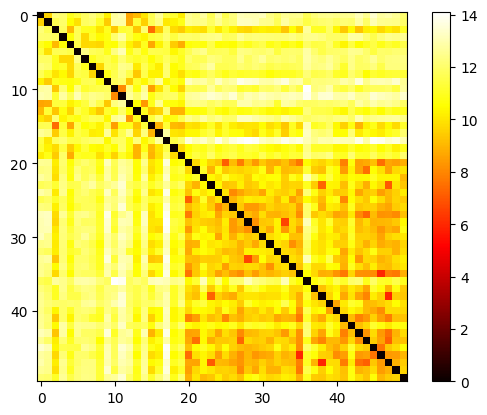

clothes: 100.0%
history: 100.0%


,nearest,clothes-0,clothes-1,clothes-2,clothes-3,clothes-4,clothes-5,clothes-6,clothes-7,clothes-8,...,history-20,history-21,history-22,history-23,history-24,history-25,history-26,history-27,history-28,history-29
clothes-0,clothes-12,0.00,9.62,12.22,12.06,10.96,11.34,11.86,12.28,11.69,...,12.42,12.53,12.61,13.07,12.56,13.44,12.76,12.90,12.59,12.10
clothes-1,clothes-12,9.62,0.00,11.68,12.00,10.52,9.90,11.87,12.03,11.04,...,11.89,12.16,12.04,12.83,11.95,13.05,12.54,12.46,12.43,12.01
clothes-2,clothes-15,12.22,11.68,0.00,11.81,9.09,11.64,10.96,10.90,9.94,...,10.36,9.40,10.43,9.27,10.15,10.34,9.71,10.18,9.88,11.05
clothes-3,clothes-6,12.06,12.00,11.81,0.00,10.59,11.72,9.75,11.13,10.46,...,11.94,11.94,12.84,12.77,12.10,11.60,12.14,12.52,12.41,12.58
clothes-4,clothes-15,10.96,10.52,9.09,10.59,0.00,11.55,9.71,9.81,9.67,...,11.03,10.32,11.45,10.52,11.00,11.49,10.81,11.25,10.98,11.55
clothes-5,clothes-1,11.34,9.90,11.64,11.72,11.55,0.00,12.38,11.76,11.59,...,11.97,12.06,12.52,12.48,12.00,11.45,11.97,11.91,12.09,12.09
clothes-6,clothes-4,11.86,11.87,10.96,9.75,9.71,12.38,0.00,10.93,11.44,...,12.15,11.85,12.43,11.86,12.08,12.61,12.01,12.26,12.32,12.37
clothes-7,clothes-8,12.28,12.03,10.90,11.13,9.81,11.76,10.93,0.00,9.66,...,11.97,11.18,12.43,11.87,11.91,12.24,11.53,12.25,12.27,12.34
clothes-8,clothes-13,11.69,11.04,9.94,10.46,9.67,11.59,11.44,9.66,0.00,...,11.12,10.93,12.03,11.56,10.51,11.24,11.00,11.19,11.29,11.28
clothes-9,clothes-12,10.21,9.46,10.94,10.78,10.67,10.90,11.67,11.73,10.81,...,12.36,12.89,12.58,13.59,12.45,12.99,13.03,12.94,13.34,12.62


In [ ]:
def find_nearest_sample(v_features_dict):
  distances = []
  accuracy = {_k: 0 for _k in data}

  for key in v_features_dict:
    distance_i = {_k: np.linalg.norm(v_features_dict[key] - v_features_dict[_k]) for _k in v_features_dict}
    nearest_distance = list({k: v for k, v in sorted(distance_i.items(), key=lambda item: item[1])})[1]
    distance_i = {_k: round(_v, 2) for _k, _v in distance_i.items()}
    distances.append([nearest_distance, *distance_i.values()])
    category = str(key).split("-")[0]
    if category in nearest_distance:
      accuracy[category] = accuracy[category] + 1

  plt.imshow(np.array([ele[1:] for ele in distances]), cmap='hot', interpolation='nearest')
  plt.colorbar()
  plt.show()

  for key, value in accuracy.items():
    print(f"{key}: {round(100* value / len(data[key]), 2)}%")
    
  df = pd.DataFrame(distances, columns =["nearest", *v_features_dict.keys()], index=v_features_dict.keys())
  return df

find_nearest_sample(features_dict)

In [ ]:
features_set.shape, type(features_set), type(features_set[0])

((50, 768), numpy.ndarray, numpy.ndarray)

# sSMC-FCM Clustering

In [ ]:
import sys
import math
import traceback
import numpy as np
import matplotlib.pyplot as plt
from pydantic import BaseModel
from typing import Optional, List, Dict
import scipy.optimize

In [ ]:
from numpy.ma.core import argmax
class sSMC_FCM():

  def __init__(
    self,
    dataset: List = [],
    supervised_set: Optional[List] = [],
    n_clusters: Optional[int] = 3,
    fuzzi_M: Optional[int] = 2,
    alpha: Optional[float] = 0.6,
    epsilon: Optional[float] = 0.001,
    n_loop: Optional[int] = 50,
    fuzzi_jump: Optional[int] = 0.5,
    fuzzi_M2_max: Optional[int] = 10,
    is_plot: Optional[bool] = True
  ) -> None:
    self.dataset = dataset
    self.n_clusters = n_clusters
    # supervised_set.extend([[] for _ in range(n_clusters - len(supervised_set))])
    self.supervised_set = supervised_set
    self.fuzzi_M = fuzzi_M
    self.alpha = alpha
    self.epsilon = epsilon
    self.membership = [[0] * n_clusters for i in range(len(dataset))]
    self.fuzzi_set = [[fuzzi_M] * n_clusters for i in range(len(dataset))]
    self.centroid = []
    self.n_loop = n_loop
    self.fuzzi_jump = fuzzi_jump
    self.fuzzi_M2_max = fuzzi_M2_max
    self.is_stop = False
    self.pred_labels = [[] for _ in range(n_clusters)]
    self.is_plot = is_plot
    self.loss_values = []
    
  def clustering(self):
    self.__generate_centroid()
    th_loop = 1
    while th_loop <= self.n_loop and not self.is_stop:
      self.is_stop = True
      self.__update_membership(th_loop)
      self.__update_centroid(th_loop)
      self.__calculate_loss_function()
      th_loop += 1
    plt.plot(self.loss_values)
    plt.title("Loss function") 
    plt.show()
    for idx, membership in enumerate(self.membership):
      id_cluster = np.argmax(membership)
      self.pred_labels[id_cluster].append(idx)
    self.pred_labels = np.array(self.pred_labels, dtype=object)

  def __generate_centroid(self):
    # computing centroid for supervised clusters
    for idx, supervised_in_cluster in enumerate(self.supervised_set):
      __centroid = []
      if not supervised_in_cluster:
        continue
      supervised_data = [self.dataset[i] for i in supervised_in_cluster]
      __centroid = np.round(np.sum(supervised_data, axis=0) / len(supervised_in_cluster), 2)
      self.centroid.append(__centroid)

    #computing random centroid for unsupervised clusters (apply kmean++)
    for k in range(self.n_clusters - len(self.centroid)):
      ## initialize a list to store distances of data 
      ## points from nearest centroid 
      dist = [] 
      for i in range(self.dataset.shape[0]): 
        point = self.dataset[i, :] 
        d = sys.maxsize 
          
        ## compute distance of 'point' from each of the previously 
        ## selected centroid and store the minimum distance 
        for j in range(len(self.centroid)): 
          temp_dist = self.__calculate_euclid_distance(point, self.centroid[j]) 
          d = min(d, temp_dist) 
        dist.append(d) 
            
      ## select data point with maximum distance as our next centroid 
      dist = np.array(dist) 
      next_centroid = self.dataset[np.argmax(dist), :] 
      self.centroid.append(next_centroid) 
    
    self.centroid = np.array(self.centroid)
    self.plot("Initial Centroids") 

  def __update_membership(self, th_loop):

    # for idx, member in enumerate(self.membership):
    #   print(idx, member, np.argmax(member))

    fuzzi_M_pow = 1 / (self.fuzzi_M - 1)
    Dij = [
        [
            self.__calculate_euclid_distance(point, centroid)
            for centroid in self.centroid
        ]
        for point in self.dataset
    ]

    # without supervision
    for id_point, point in enumerate(self.dataset):
      Dij_pow = []
      sum_Dij_pow = 0
      for id_centroid, centroid in enumerate(self.centroid):
        Dik_pow = math.pow(Dij[id_point][id_centroid], fuzzi_M_pow)
        Dij_pow.append(Dik_pow)
        sum_Dij_pow += 1 / Dik_pow
      
      membership = [
          1 / (Dik_pow * sum_Dij_pow)
          for Dik_pow in Dij_pow
      ]
      self.membership[id_point] = membership
    
    # with supervision
    if th_loop < 4:
      self.__calculate_M2()
    for id_cluster, supervised_cluster in enumerate(self.supervised_set):
      for id_point in supervised_cluster:
        fuzzi_M2 = self.fuzzi_set[id_point][id_cluster]
        dmin = min(Dij[id_point])
        dij = [distance_ij / dmin for distance_ij in Dij[id_point]]
        uij = [
            math.pow(1 / (self.fuzzi_M * pow(dij[k], 2)), fuzzi_M_pow)
            if k != id_cluster else 0
            for k in range(self.n_clusters)
        ]
        right_expression = math.pow(1 / (fuzzi_M2 * pow(dij[id_cluster], 2)), 1 / (fuzzi_M2 - 1))
        uik_pow = (fuzzi_M2 - self.fuzzi_M) / (fuzzi_M2 - 1)
        def __func(uik):
            res = uik / ((uik + sum(uij)) ** uik_pow) - right_expression
            return res
        try:
            uik = scipy.optimize.fsolve(__func, 0)
            uik = uik[0]
            if not isinstance(uik, float):
                raise Exception("uik is complex")
            uij[id_cluster] = uik
        except:
            traceback.print_exc()
            continue
        membership = [uik / sum(uij) for uik in uij]
        self.membership[id_point] = membership

  def __update_centroid(self, th_loop):
    th_centroid = []
    for id_centroid, centroid in enumerate(self.centroid):
      uik_pow = [
          math.pow(self.membership[id_point][id_centroid], self.fuzzi_set[id_point][id_centroid])
          for id_point in range(len(self.dataset))
      ]
      new_centroid = np.sum([uik * point for uik, point in zip(uik_pow, self.dataset)], axis=0) / sum(uik_pow)
      th_centroid.append(new_centroid)
      if self.__calculate_euclid_distance(centroid, new_centroid) > self.epsilon:
        self.is_stop = False  
    self.centroid = np.array(th_centroid)
    self.plot(f"{th_loop}-th loop")
    
  def plot(self, title: Optional[str] = None): 
      if not self.is_plot:
        return
      color = iter(plt.cm.rainbow(np.linspace(0, 1, self.n_clusters)))
      for idx, cluster in enumerate(self.supervised_set):
        c = next(color)
        supervised_points = np.array([self.dataset[id].tolist() for id in cluster])
        plt.scatter(supervised_points[:, 0], supervised_points[:, 1], marker = 'x',
                    color = c, label = f'supervised points {idx}')

      color = iter(plt.cm.rainbow(np.linspace(0, 1, self.n_clusters)))
      cluster_members = [[] for _ in range(self.n_clusters)]
      for point, membership in zip(self.dataset, self.membership):
        id_cluster = np.argmax(membership)
        cluster_members[id_cluster].append(point.tolist())
      for cluster_member in cluster_members:
        if not cluster_member:
          continue
        cluster_member = np.array(cluster_member)
        c = next(color)
        plt.scatter(cluster_member[:, 0], cluster_member[:, 1], marker = '.',  
                    color = c, label = 'cluster points') 
      plt.scatter(self.centroid[:, 0], self.centroid[:, 1],  
                  color = 'black', label = 'cluster centroids') 
      plt.title(title) 
      plt.legend(bbox_to_anchor =(1, 1))
      plt.xlim(min(self.dataset[:, 0]), max(self.dataset[:, 0])) 
      plt.ylim(min(self.dataset[:, 1]), max(self.dataset[:, 1])) 
      plt.show() 

  def __calculate_M2(self):
    def __calculate_left_expression(fuzzi_M2):
      return fuzzi_M2 * math.pow(self.alpha, fuzzi_M2 - 1)
    def __calculate_right_expression(membership):
      return self.fuzzi_M * math.pow((
          (1 - self.alpha) / (1 / membership - 1)
      ), self.fuzzi_M - 1)
    def __solve_fuzzi_M2(right_expression):
      fuzzi_M2 = self.fuzzi_M
      left_expression = __calculate_left_expression(fuzzi_M2)
      while left_expression > right_expression and fuzzi_M2 <= self.fuzzi_M2_max:
        fuzzi_M2 += self.fuzzi_jump
        left_expression = __calculate_left_expression(fuzzi_M2)
      return fuzzi_M2

    for id_cluster, supervised_cluster in enumerate(self.supervised_set):
      for id_point in supervised_cluster:
        right_expression = __calculate_right_expression(self.membership[id_point][id_cluster])
        # fuzzi_M2 = __solve_fuzzi_M2(right_expression)
        # self.fuzzi_set[id_point][id_cluster] = fuzzi_M2
        def __func(fuzzi_M2):
            res = fuzzi_M2 * math.pow(self.alpha, fuzzi_M2 - 1) - right_expression
            return res
        try:
            fuzzi_M2 = scipy.optimize.fsolve(__func, self.fuzzi_M)
            fuzzi_M2 = fuzzi_M2[0]
            if not isinstance(fuzzi_M2, float):
                raise Exception("fuzzi_M2 is complex")
            self.fuzzi_set[id_point][id_cluster] = fuzzi_M2 if fuzzi_M2 > self.fuzzi_M else self.fuzzi_M + 1
        except:
            traceback.print_exc()

  def __calculate_euclid_distance(self, p1, p2):
    distance = np.sqrt(np.sum((p1 - p2)**2))
    return distance if distance else self.epsilon
    
  def __calculate_loss_function(self):
    self.loss_values.append(sum([
        sum([
            math.pow(self.membership[id_point][id_centroid], self.fuzzi_set[id_point][id_centroid]) * self.__calculate_euclid_distance(point, centroid)
            for id_centroid, centroid in enumerate(self.centroid)
        ])
        for id_point, point in enumerate(self.dataset)
    ]))

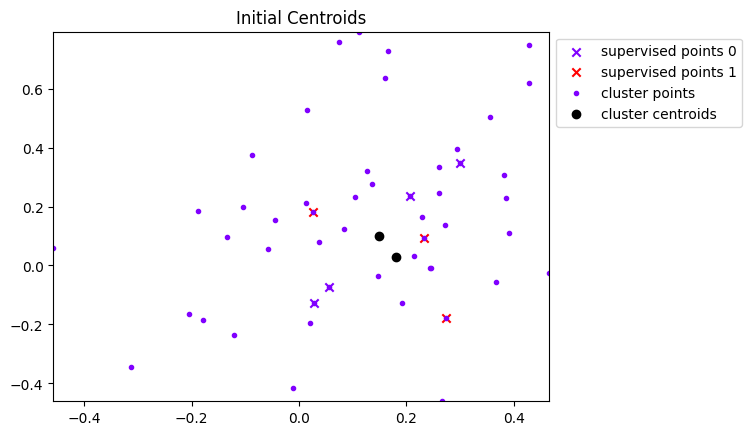

/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


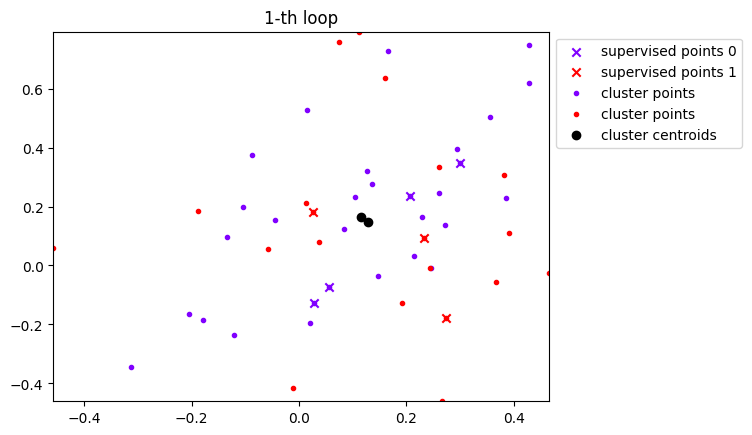

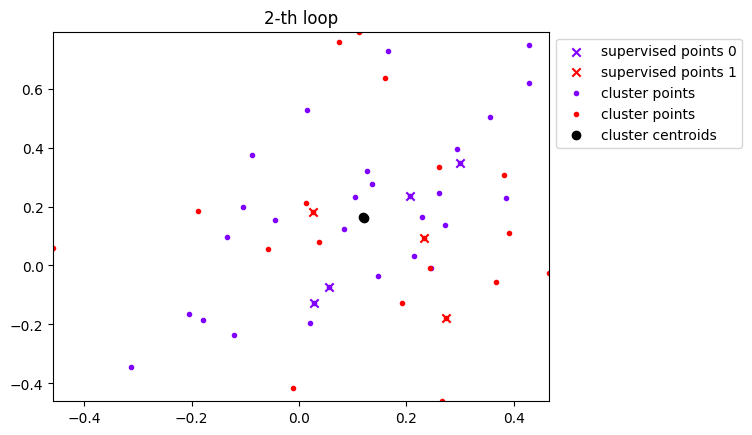

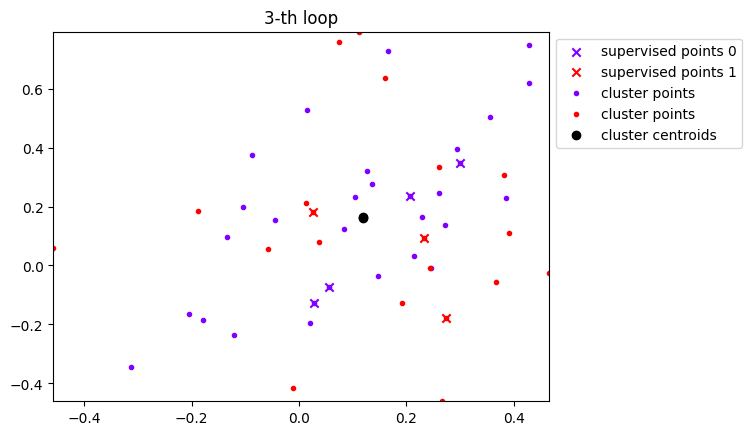

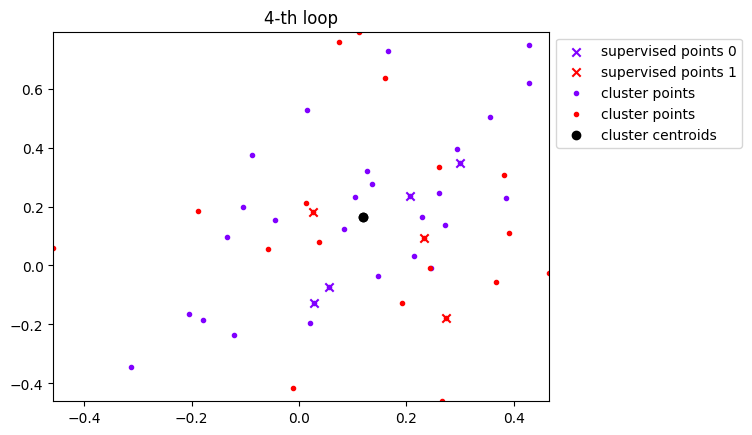

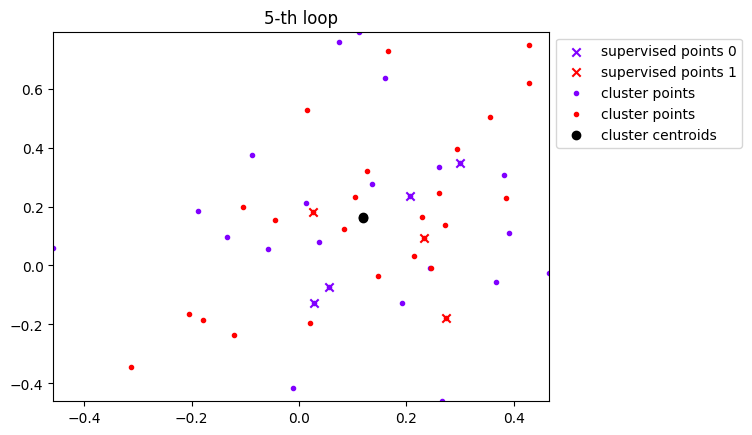

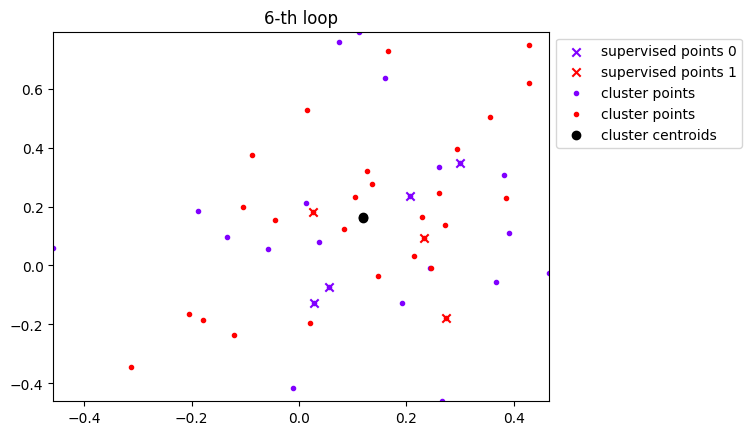

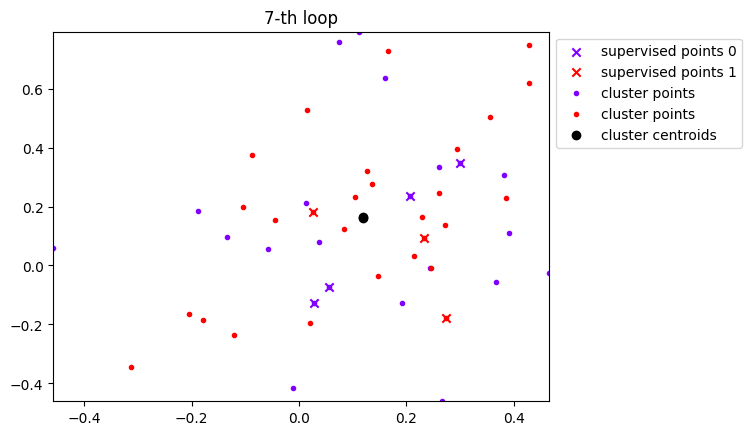

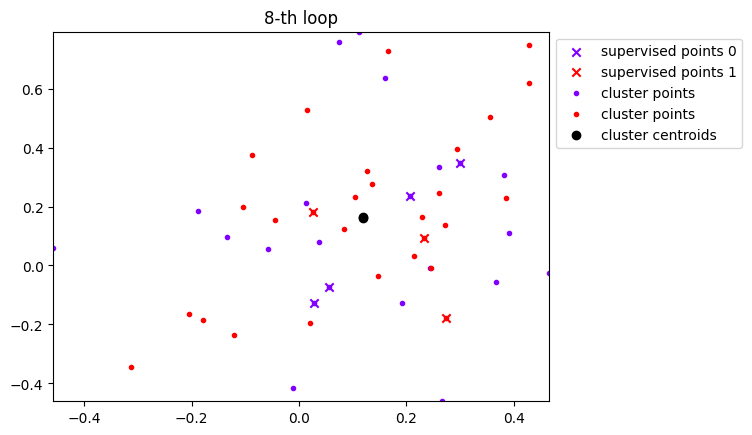

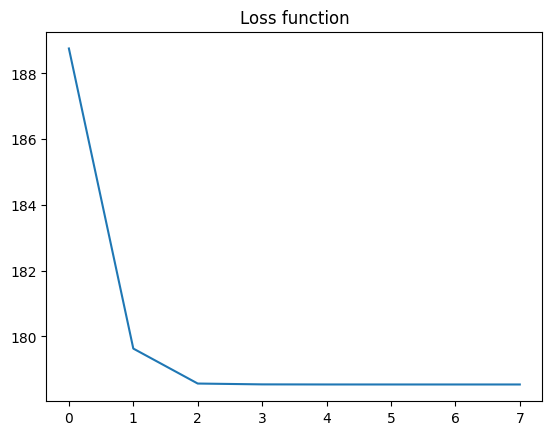

clusters:  [list([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 34, 35, 36, 37])
 list([0, 1, 2, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])]
loss functions:  [188.75996037226457, 179.6312364383208, 178.56778204430432, 178.54239116997195, 178.5396643303463, 178.53940172714454, 178.5393869348848, 178.53939058720496]


In [ ]:
supervised_set = [
    [34, 35, 36, 37],
    [0, 1, 2],
]
ssmc_fcm = sSMC_FCM(dataset=features_set, n_clusters=len(data), supervised_set=supervised_set)
ssmc_fcm.clustering()
print("clusters: ", ssmc_fcm.pred_labels)
print("loss functions: ", ssmc_fcm.loss_values)

In [ ]:
np.sqrt(np.sum((ssmc_fcm.centroid[0] - ssmc_fcm.centroid[1])**2))

0.13796702

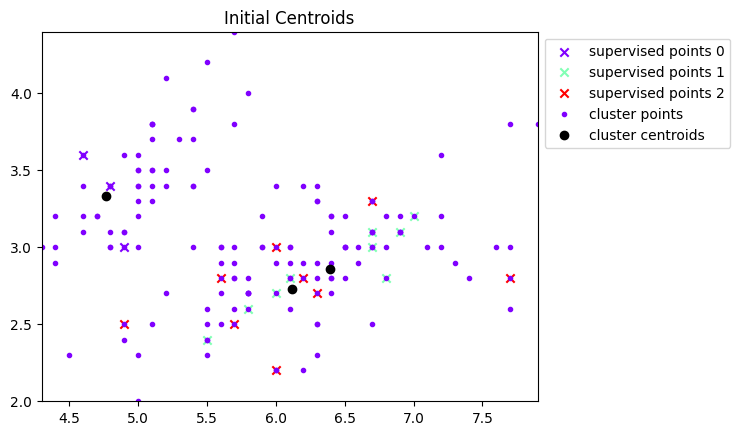

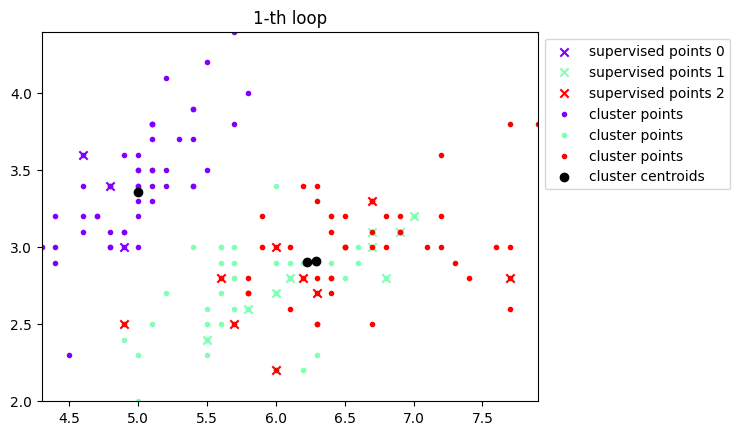

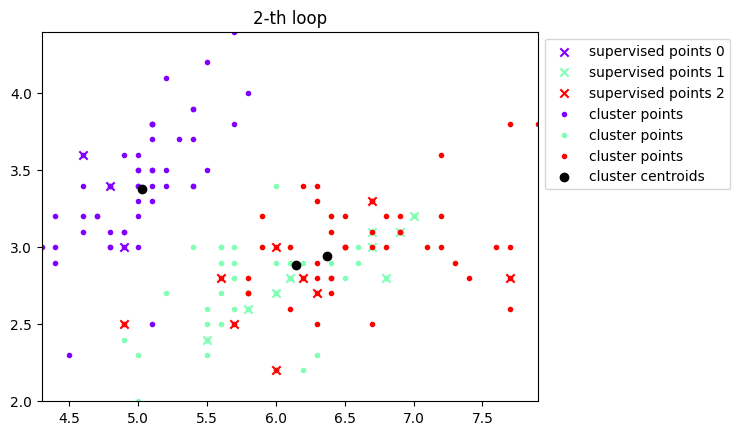

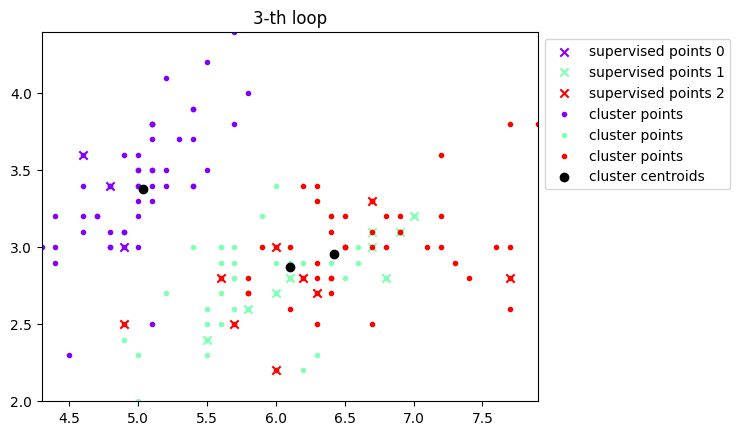

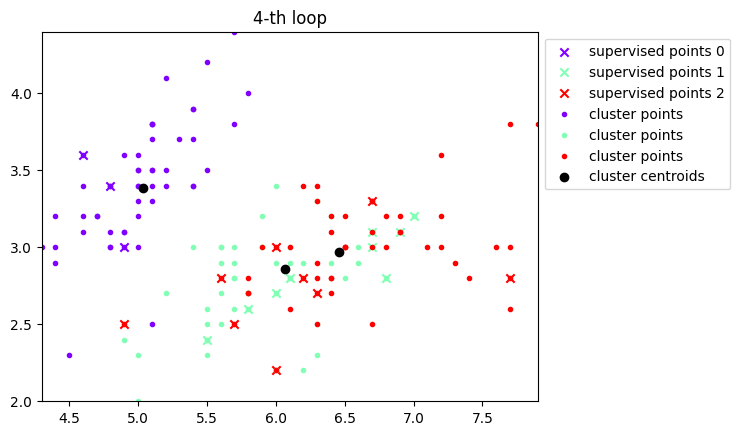

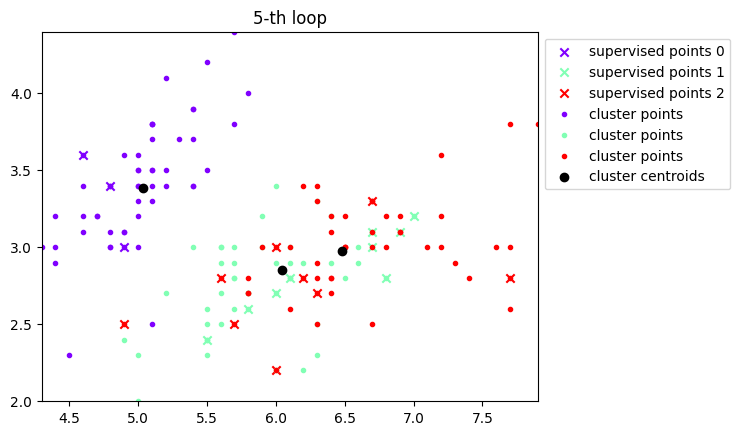

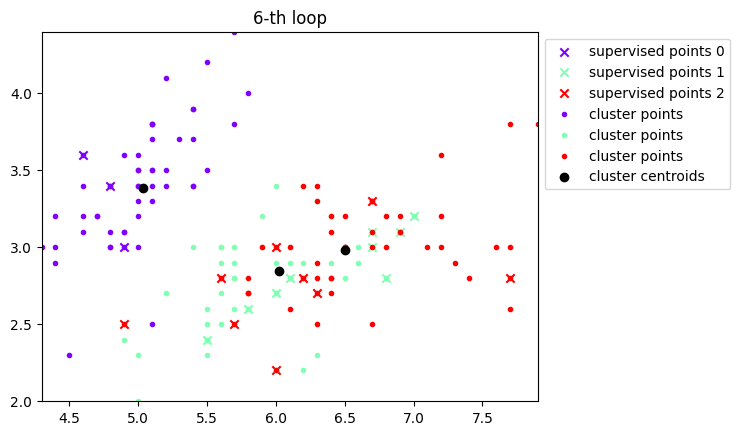

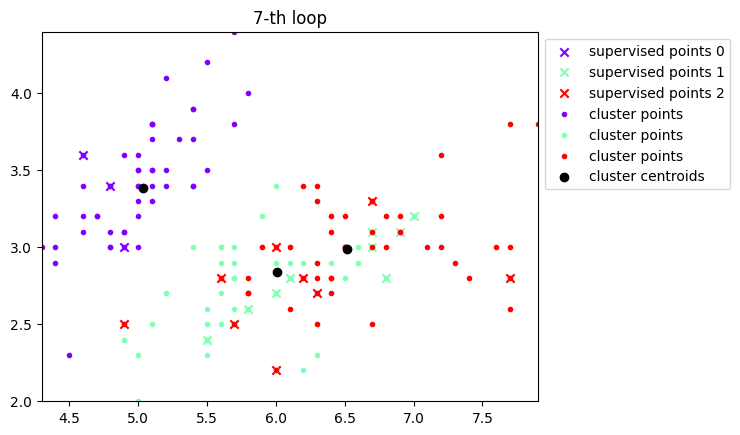

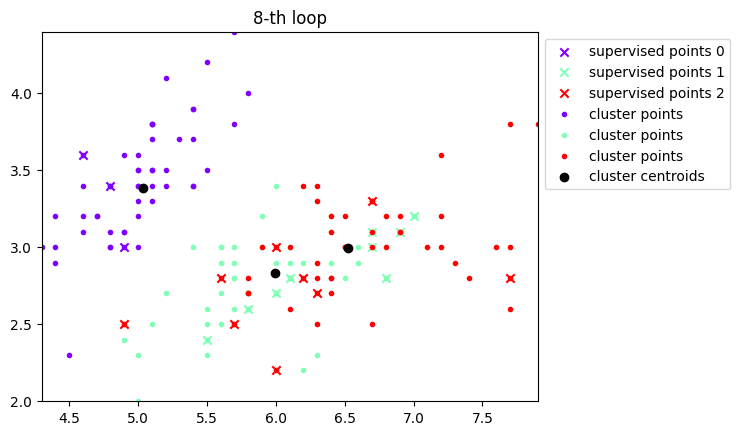

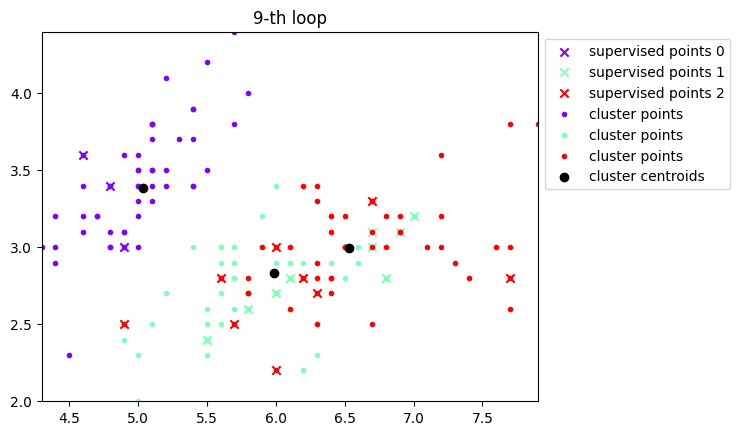

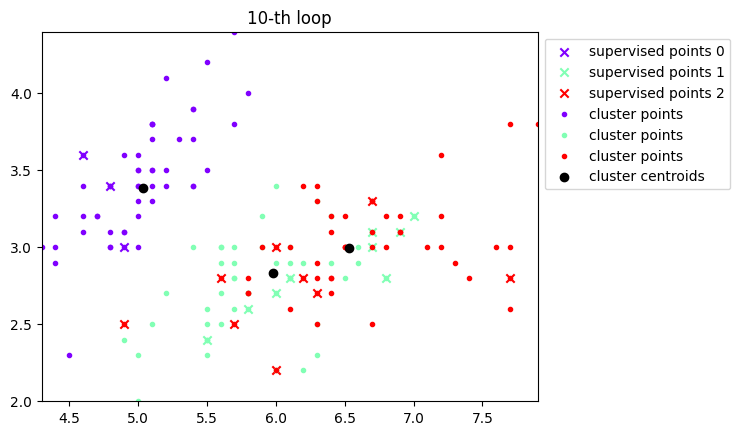

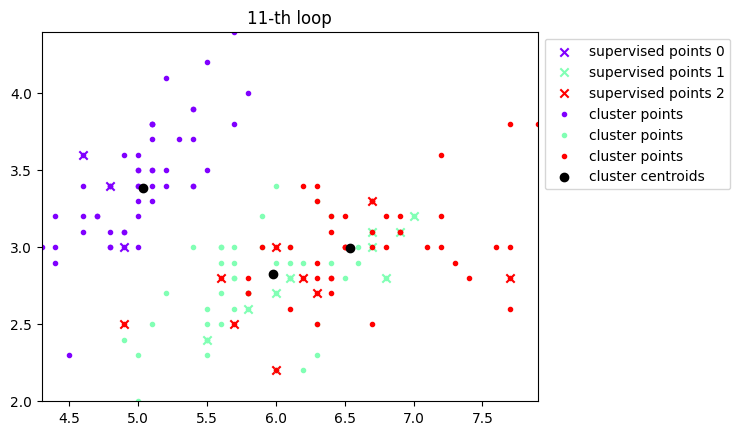

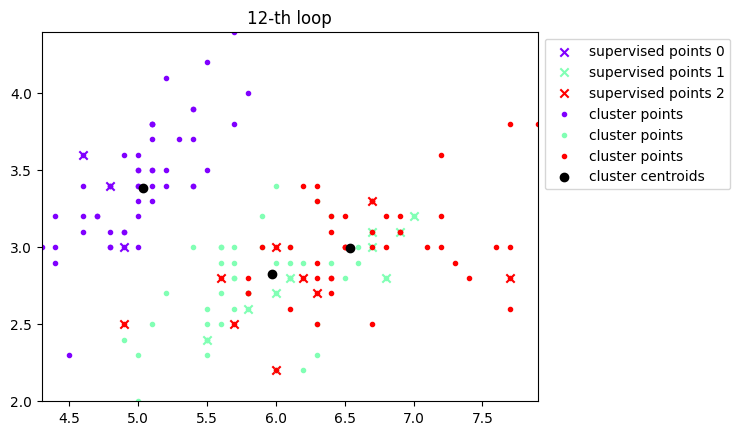

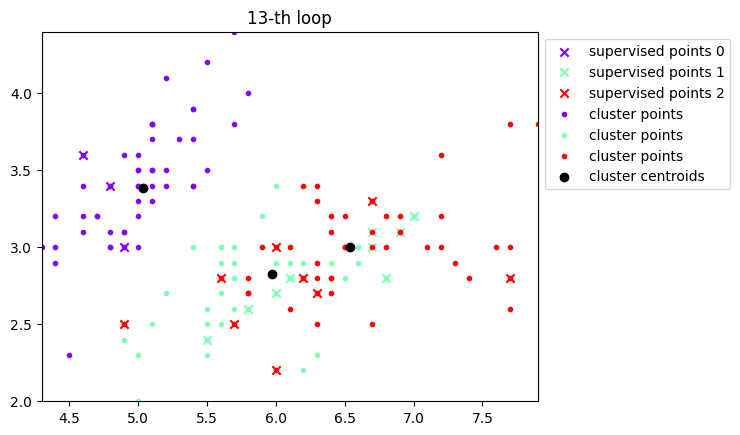

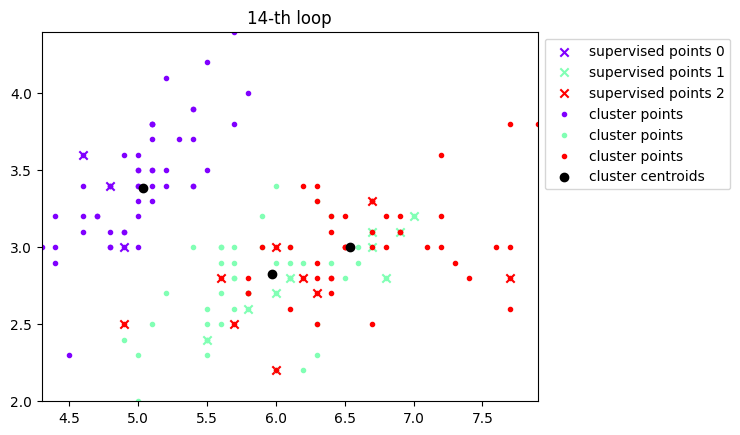

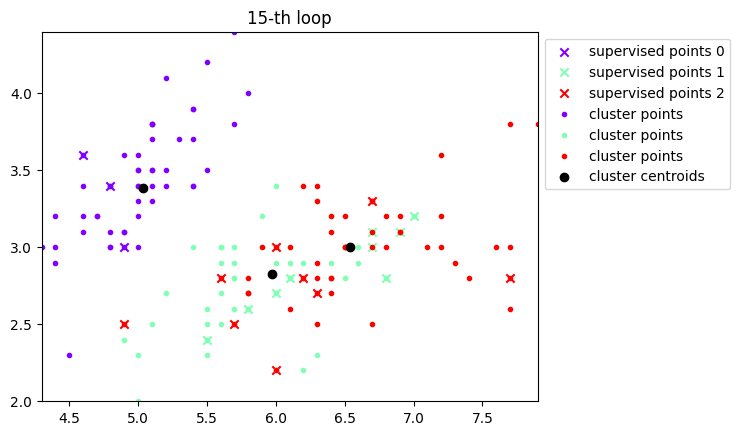

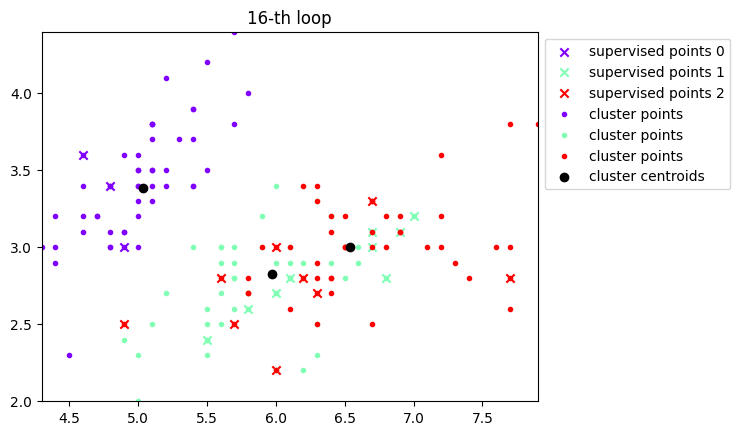

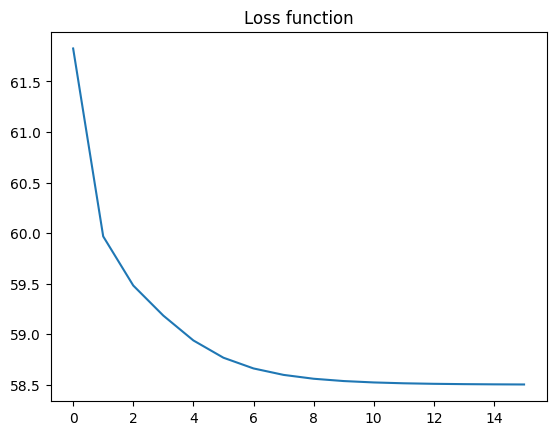

clusters:  [[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
  27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
  74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
  98 99]
 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
  118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
  136 137 138 139 140 141 142 143 144 145 146 147 148 149]]
loss functions:  [61.82628321305709, 59.96785184547135, 59.481757354496, 59.18430285990777, 58.93865190860436, 58.767745827336896, 58.66180899561959, 58.59795365599725, 58.55980168444322, 58.53700641589336, 58.523275990420906, 58.514903454389305, 58.50973059885561, 58.50649611573654, 58.504453366410196, 58.5031530764681]


In [ ]:
supervised_set = [
    [1, 11, 22], 
    [71, 81, 92, 86, 77, 50, 52, 76, 83], 
    [122, 123, 124, 126, 121, 106, 113, 138, 119], 
]
ssmc_fcm = sSMC_FCM(dataset=X, n_clusters=3, supervised_set=supervised_set, is_plot=True)
ssmc_fcm.clustering()
print("clusters: ", ssmc_fcm.pred_labels)
print("loss functions: ", ssmc_fcm.loss_values)